C:\Users\antot\AppData\Local\Temp\ipykernel_24780\300332269.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

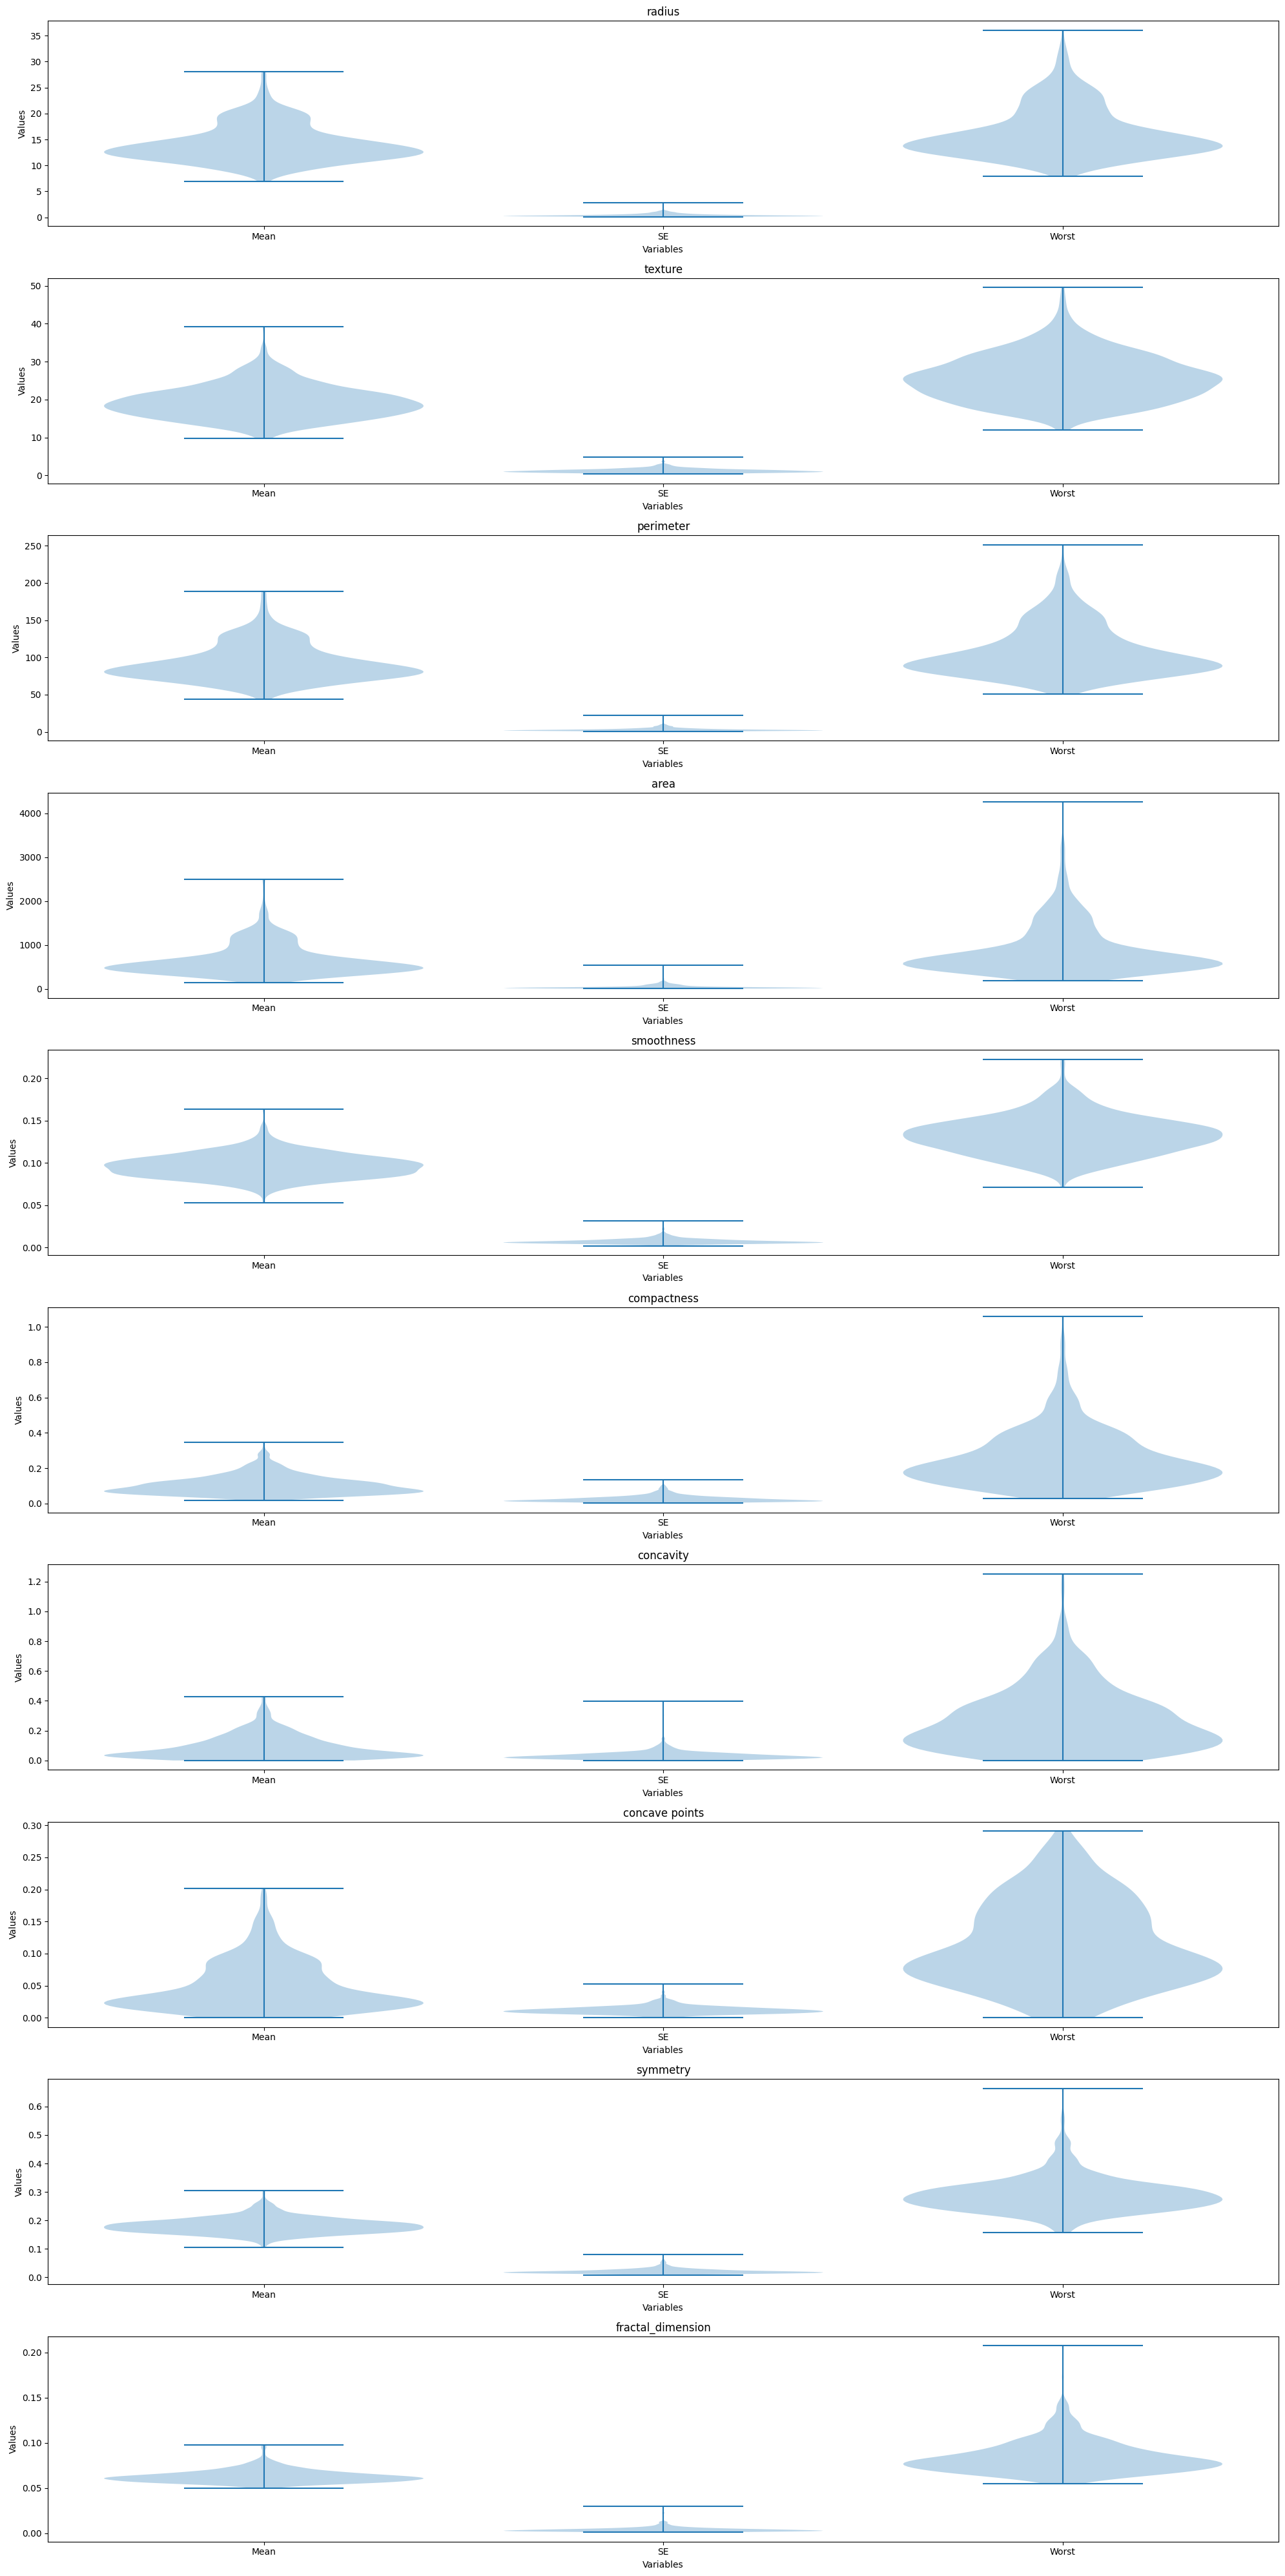

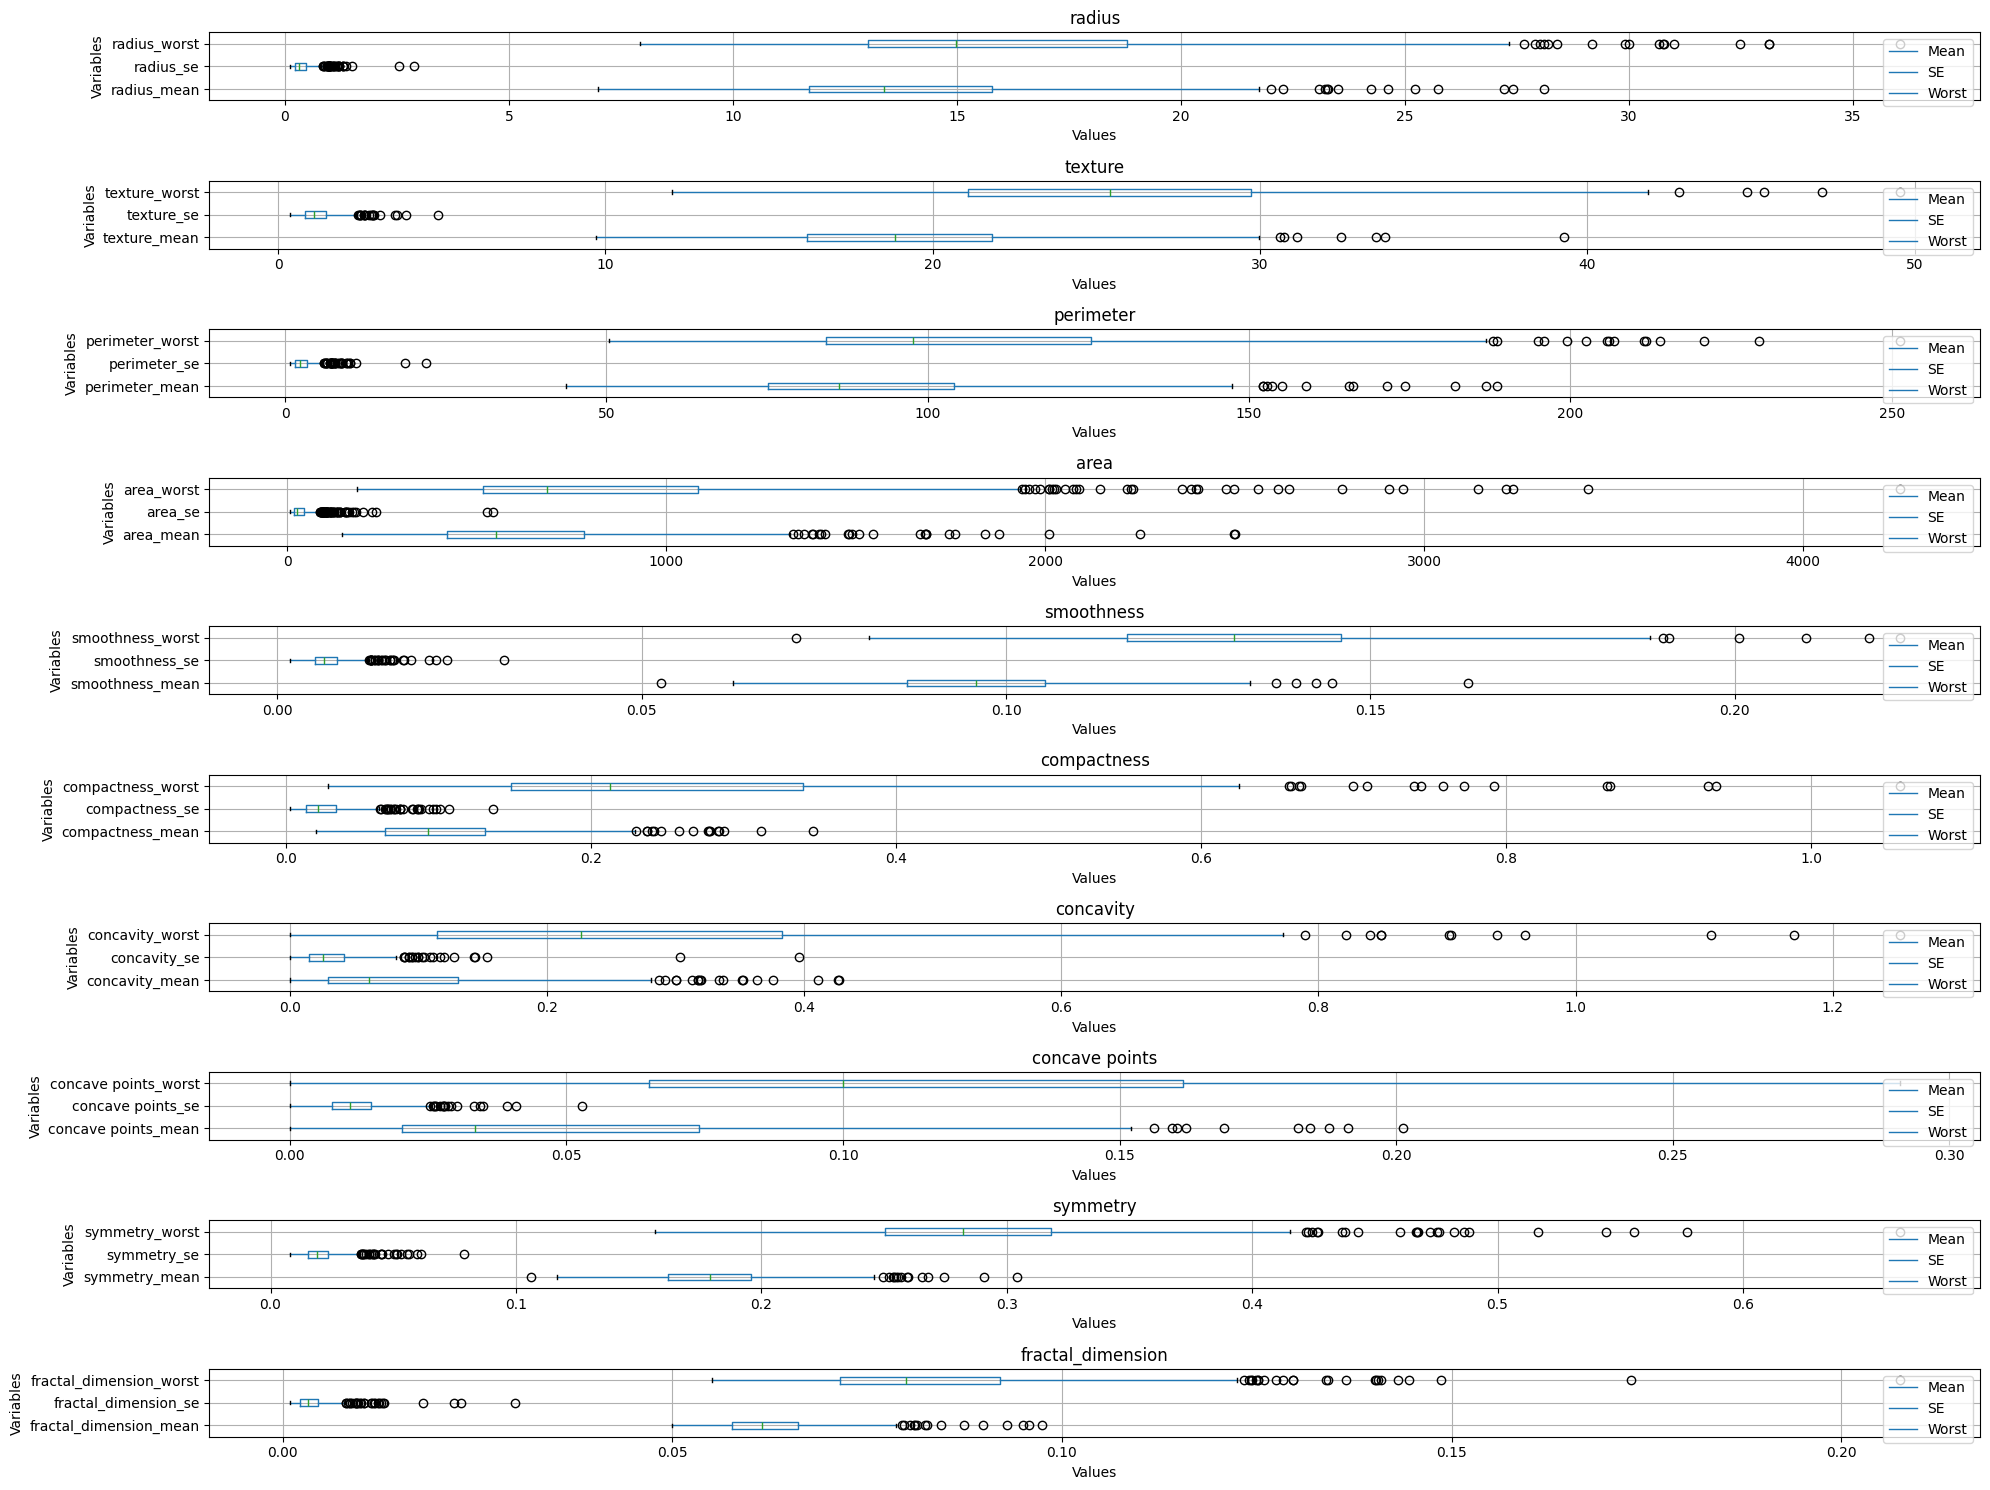

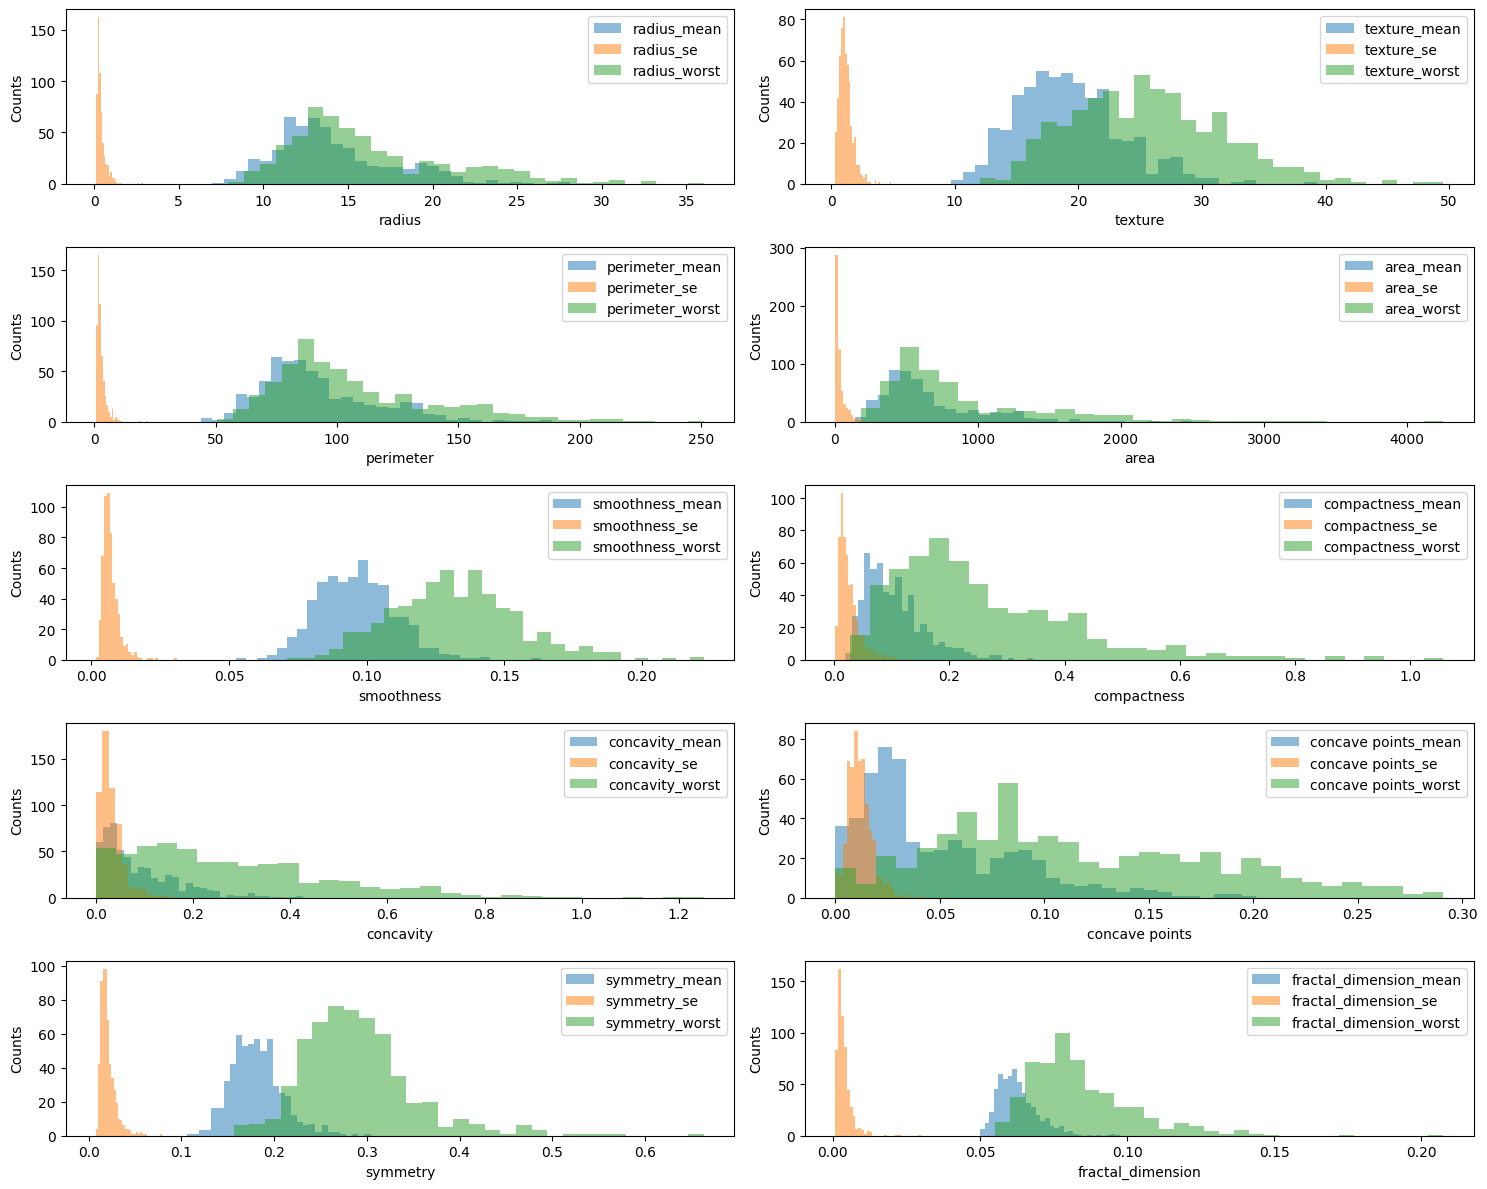

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

C:\Users\antot\AppData\Local\Temp\ipykernel_24780\300332269.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=barplot_data, x='diagnosis', y='count', palette=colors)


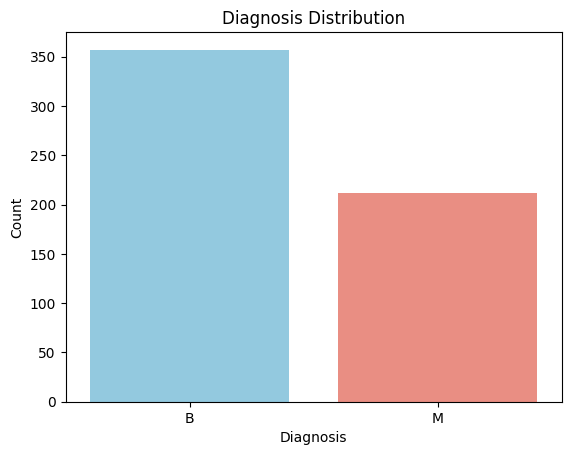

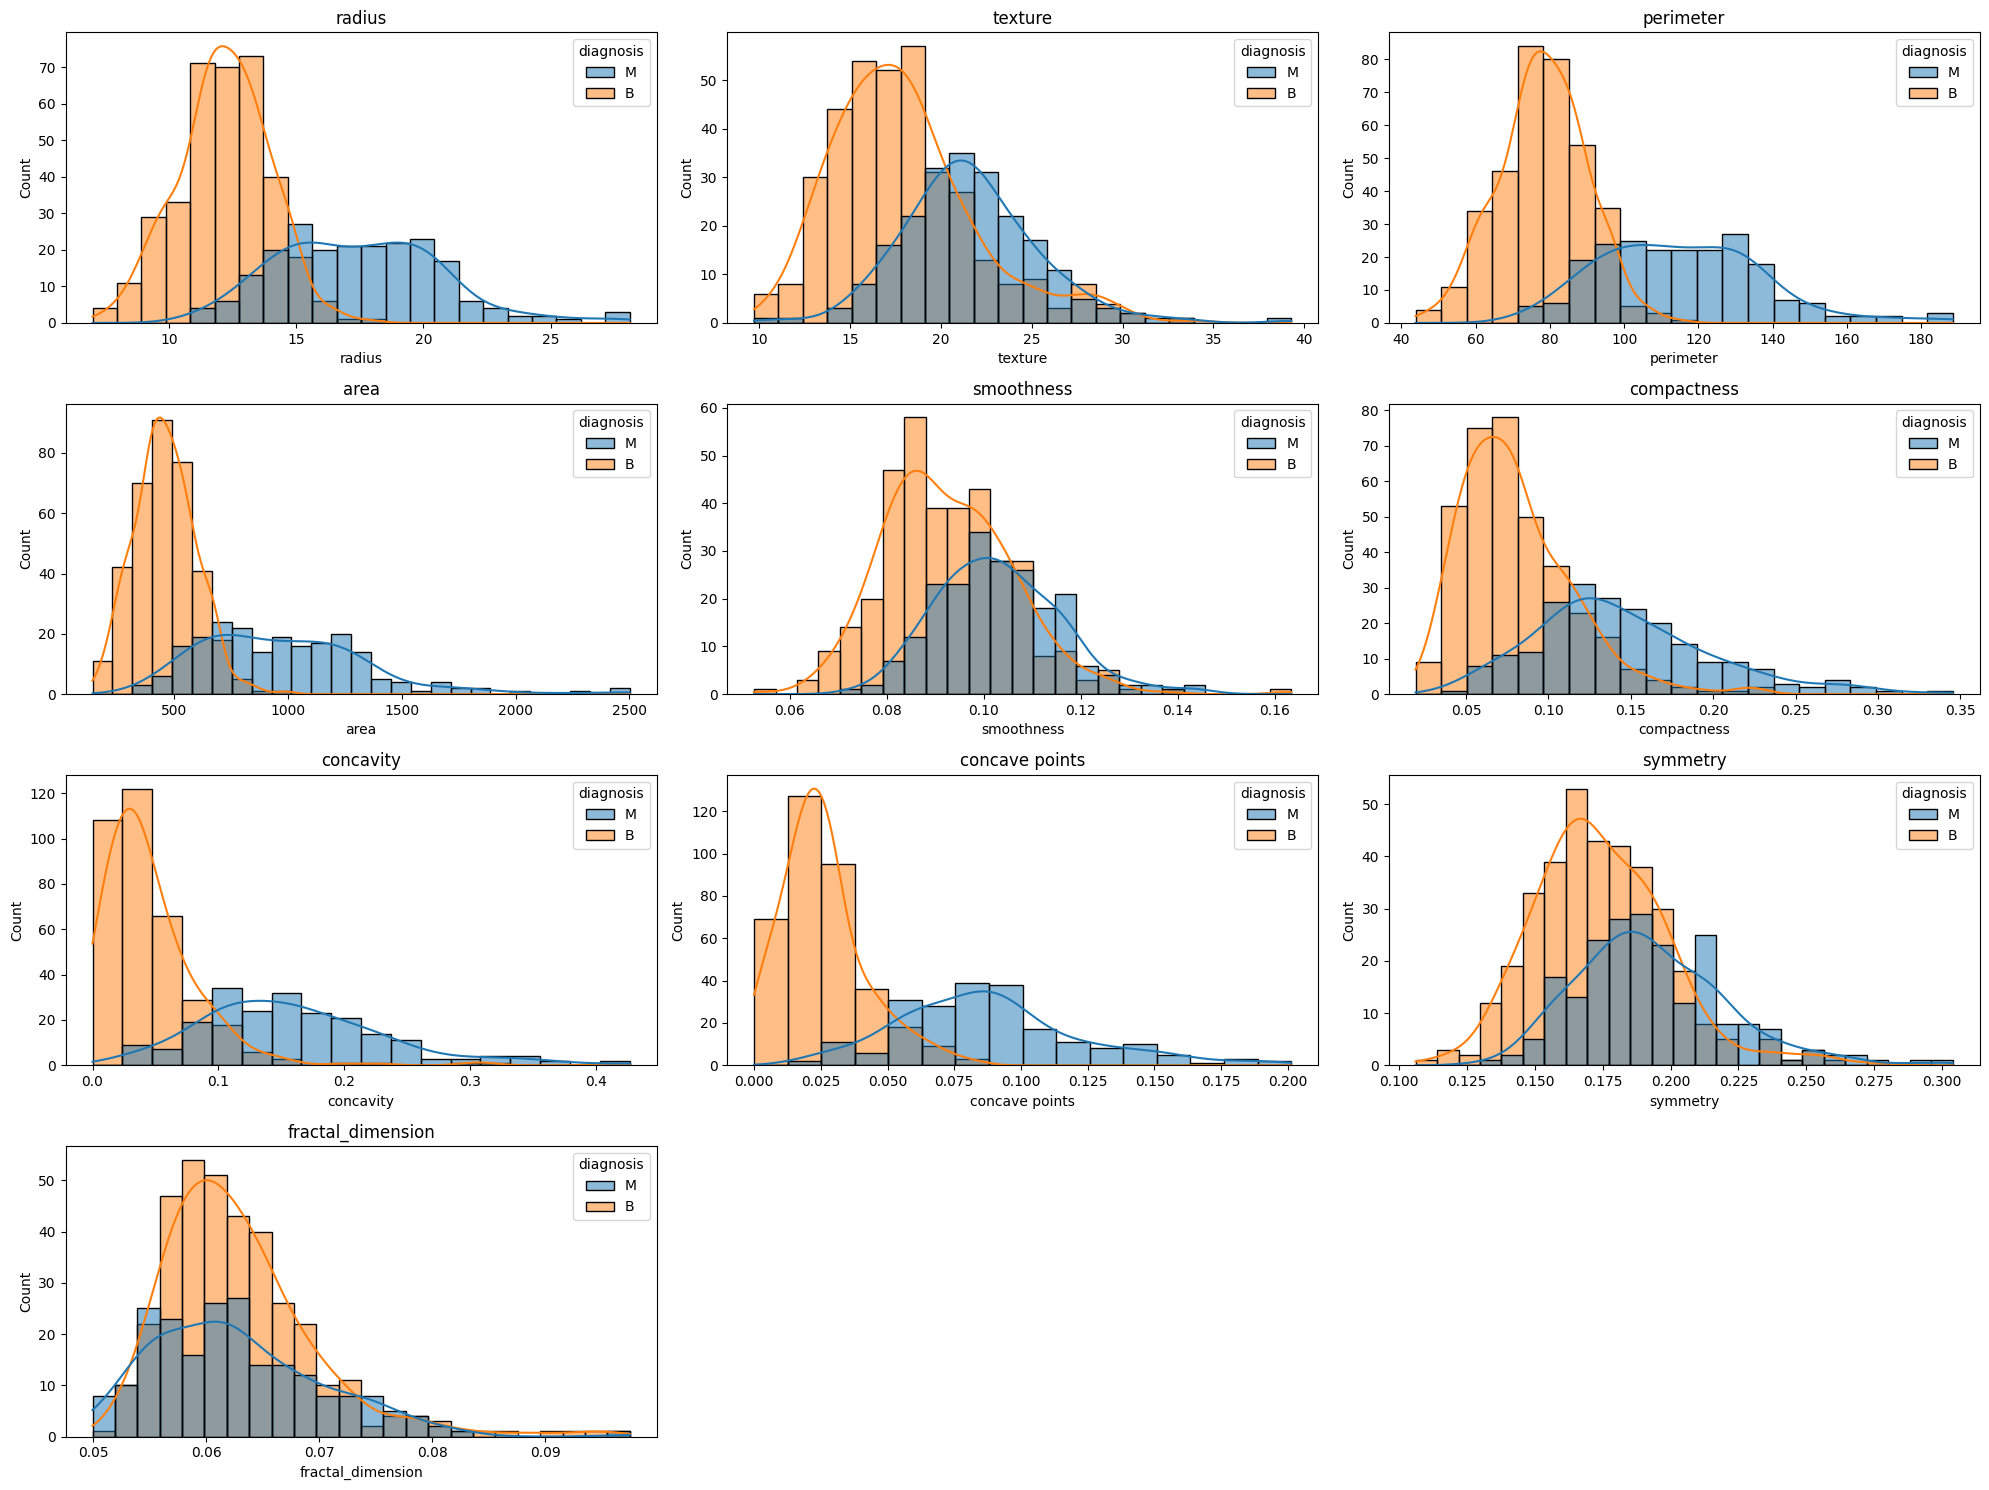

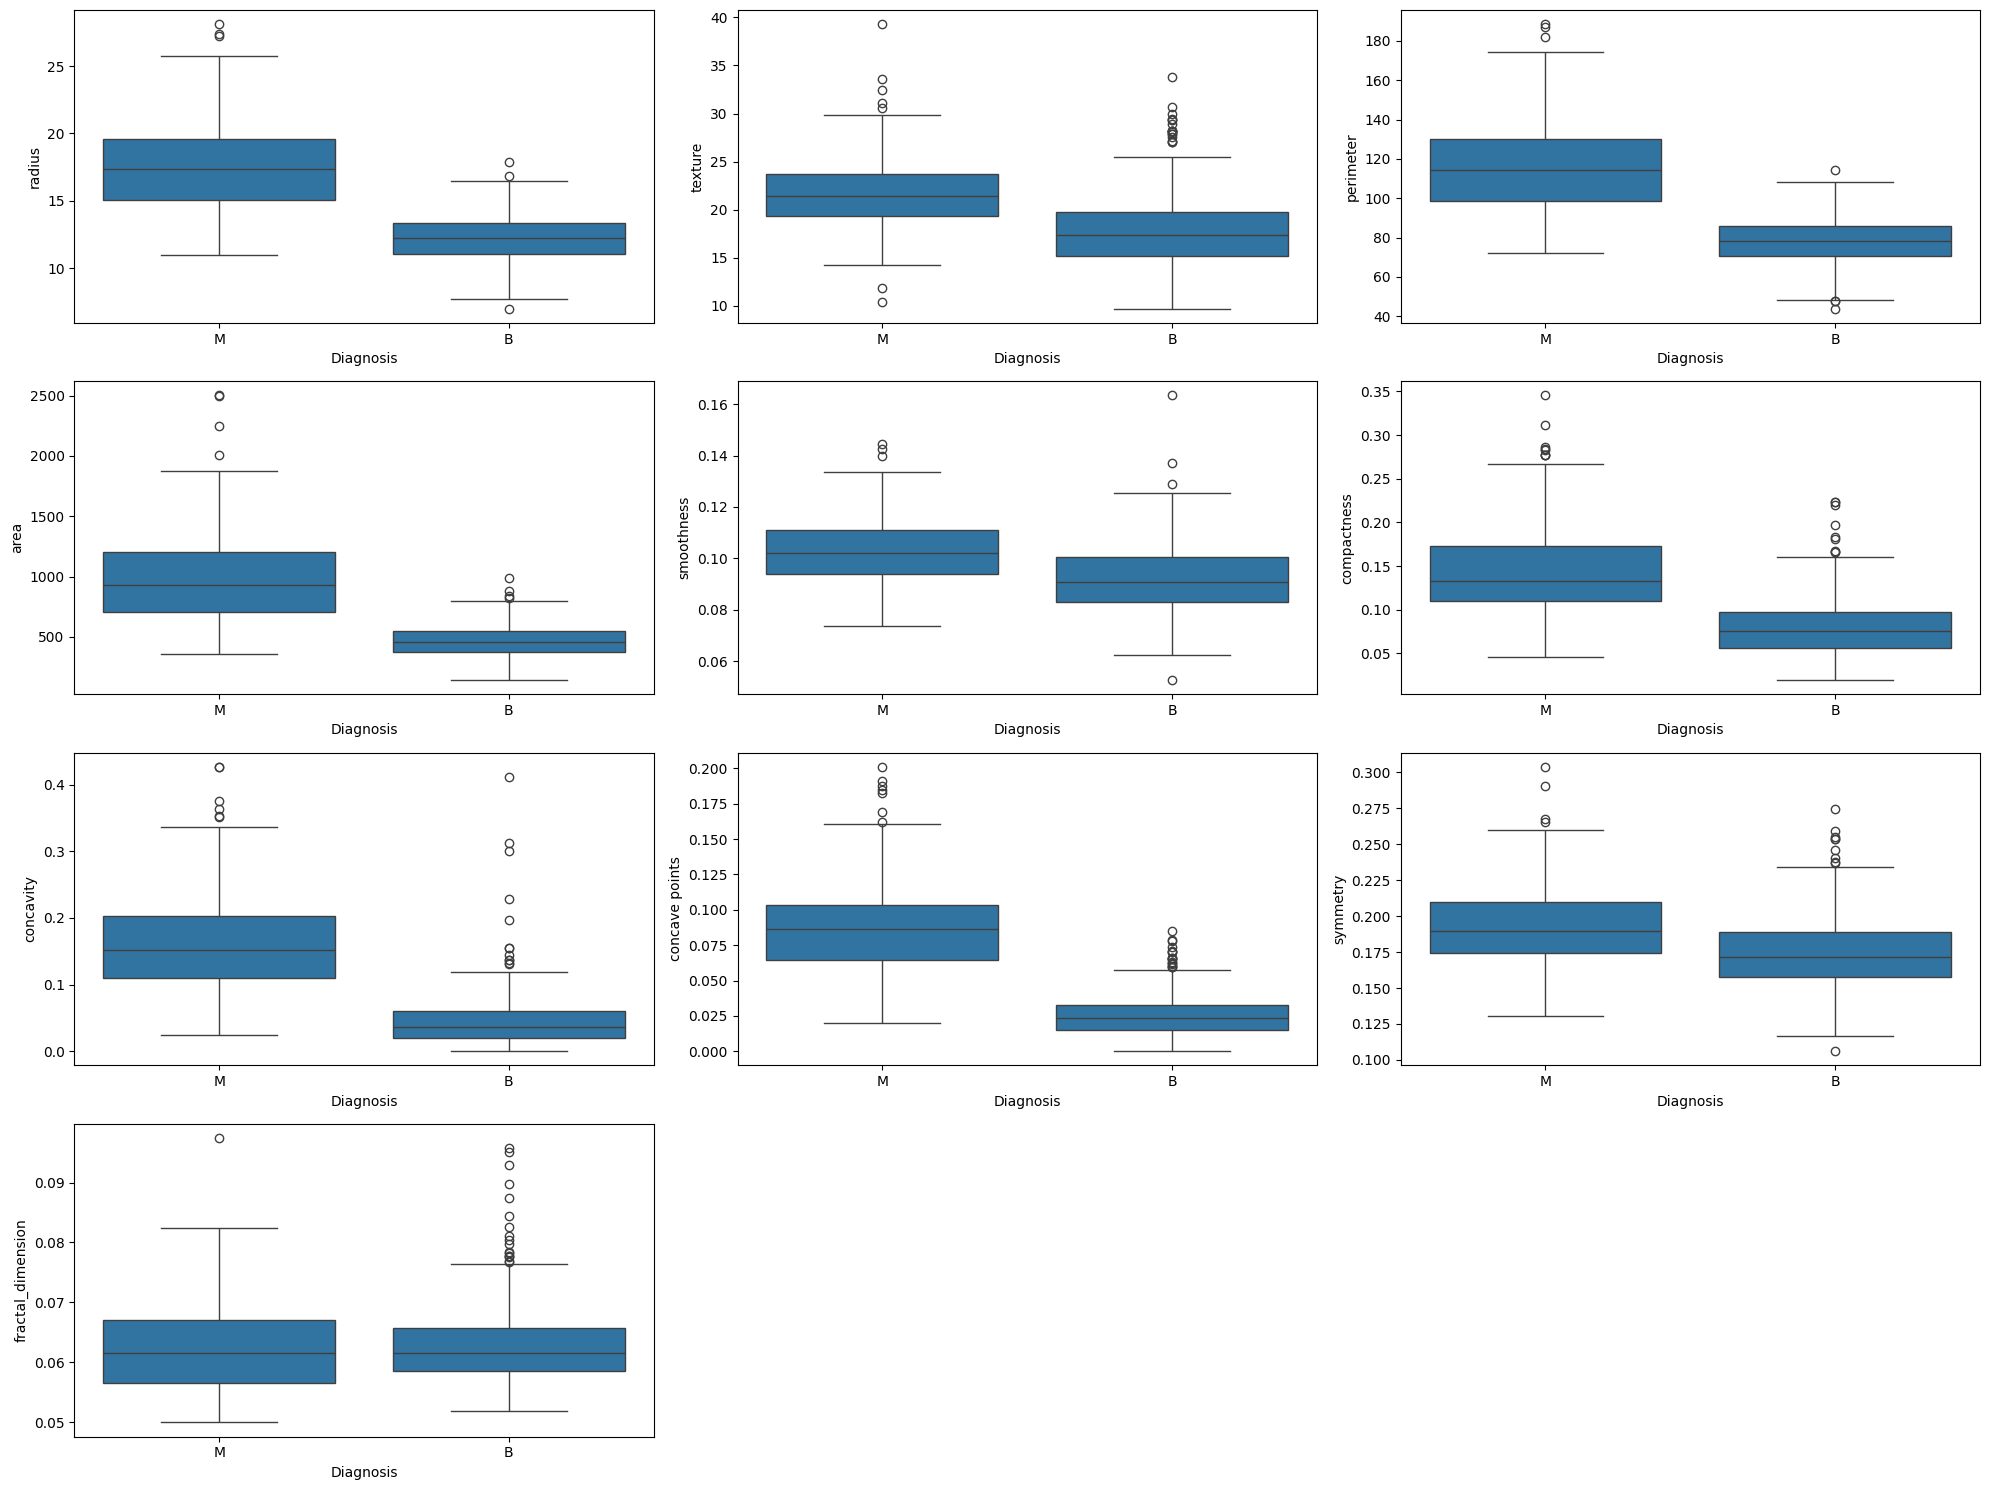

           id  diagnosis  radius  texture  perimeter    area  smoothness  \
0      842302          1   17.99    10.38     122.80  1001.0     0.11840   
1      842517          1   20.57    17.77     132.90  1326.0     0.08474   
2    84300903          1   19.69    21.25     130.00  1203.0     0.10960   
3    84348301          1   11.42    20.38      77.58   386.1     0.14250   
4    84358402          1   20.29    14.34     135.10  1297.0     0.10030   
..        ...        ...     ...      ...        ...     ...         ...   
564    926424          1   21.56    22.39     142.00  1479.0     0.11100   
565    926682          1   20.13    28.25     131.20  1261.0     0.09780   
566    926954          1   16.60    28.08     108.30   858.1     0.08455   
567    927241          1   20.60    29.33     140.10  1265.0     0.11780   
568     92751          0    7.76    24.54      47.92   181.0     0.05263   

     compactness  concavity  concave points  symmetry  fractal_dimension  
0        0.2

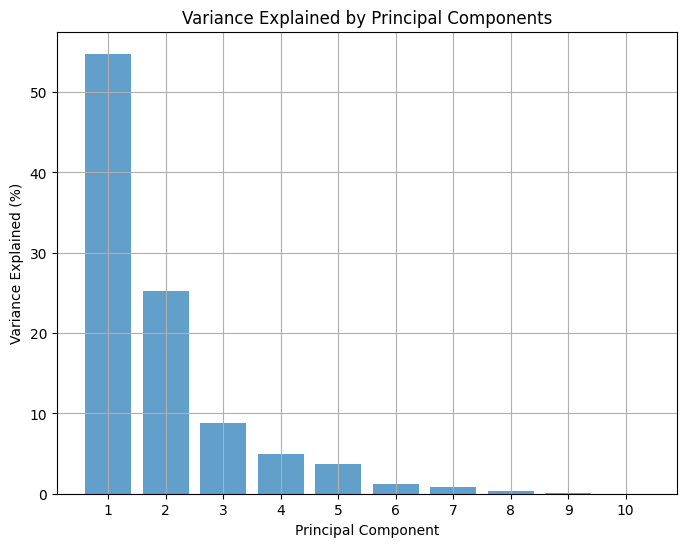

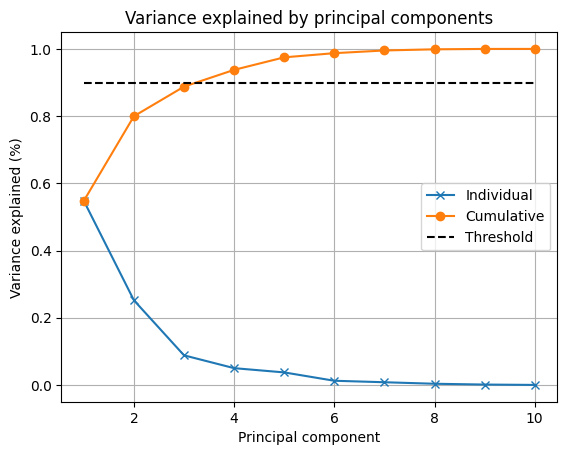

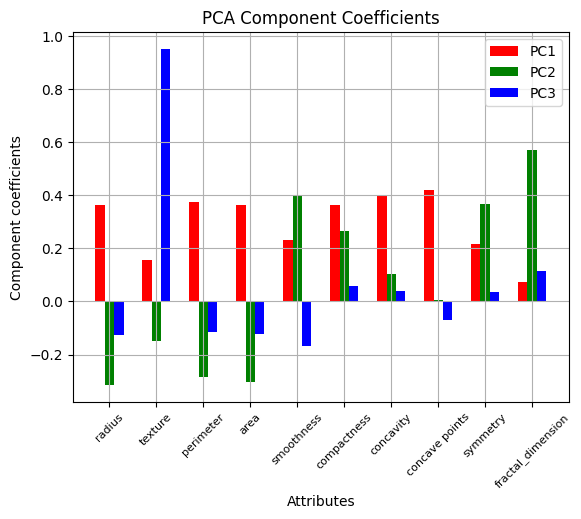

'\n# Plot the covariance matrix (Σ)\ncov_matrix = np.cov(scaled_data, rowvar=False)\nplt.figure(figsize=(10, 8))\nsns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)\nplt.title("Covariance Matrix")\n#plt.show()\n#plt.savefig("covariance_matrix.png")\n'

<Figure size 640x480 with 0 Axes>

In [1]:
#!/usr/bin/env python
# coding: utf-8

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data set and check its structure and column names
cancer_data = pd.read_csv('data.csv')
cancer_data.shape
cancer_data.columns

# Check for missing values
print(cancer_data.isnull().sum())

# Drop empty column
cancer_data = cancer_data.drop(columns= ['Unnamed: 32'])
print(cancer_data)

# Check if attributes are of the correct data type
print(cancer_data.info())

# Summary statistics
print(cancer_data.iloc[:,1:].describe())

# Create violinplots to check distribution
columns_of_interest = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 
                       'compactness', 'concavity', 'concave points', 'symmetry', 
                       'fractal_dimension']
# Create side-by-side violin plots
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 40))  # Increase figsize height for better visualization

for i, column in enumerate(columns_of_interest):
    # Select columns for '_mean', '_se', and '_worst'
    columns_to_plot = [f"{column}_mean", f"{column}_se", f"{column}_worst"]
    # Extract data for each column to plot
    data = [cancer_data[col] for col in columns_to_plot]
    # Plot the violin plots with adjusted width
    axes[i].violinplot(data, widths=0.8)  # Adjust width as needed
    # Set x-axis labels
    axes[i].set_xticks(np.arange(1, len(columns_to_plot) + 1))
    axes[i].set_xticklabels(['Mean', 'SE', 'Worst'])
    # Set plot title
    axes[i].set_title(column)
    # Set plot labels
    axes[i].set_xlabel('Variables')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

#plt.savefig("violin_plot.png")

# Create boxplots to check distribution
columns_of_interest = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 
                       'compactness', 'concavity', 'concave points', 'symmetry', 
                       'fractal_dimension']
# Create side-by-side boxplots
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 15))
for i, column in enumerate(columns_of_interest):
    # Select columns for '_mean', '_se', and '_worst'
    columns_to_plot = [f"{column}_mean", f"{column}_se", f"{column}_worst"]    
    # Plot the boxplots
    cancer_data[columns_to_plot].boxplot(ax=axes[i], vert=False)
    # Set plot title
    axes[i].set_title(column)
    # Set plot labels
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Variables')
    # Add legend
    axes[i].legend(['Mean', 'SE', 'Worst'], loc='upper right')
plt.tight_layout()
plt.show()
#plt.savefig("boxplot.png")

# Create histograms to check distribution
num_rows = len(columns_of_interest) // 2 + len(columns_of_interest) % 2
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 12))
for i, column in enumerate(columns_of_interest):
    # Calculate the row and column indices for the current subplot
    row_index = i // 2
    col_index = i % 2
    # Select columns for '_mean', '_se', and '_worst'
    columns_to_plot = [f"{column}_mean", f"{column}_se", f"{column}_worst"]
    # Plot histograms for each column in the current row
    for j, col in enumerate(columns_to_plot):
        axes[row_index, col_index].hist(cancer_data[col], bins=30, alpha=0.5, label=col)
       # axes[row_index, col_index].set_title(column)  # Set title for the subplot
        axes[row_index, col_index].set_xlabel(column)  # Set x-axis label as the column name
        axes[row_index, col_index].set_ylabel('Counts')  # Set y-axis label
        axes[row_index, col_index].legend()  # Show legend
plt.tight_layout()
plt.show()
#plt.savefig('subplots_figure.png')

# Further on, we proceed only with the mean group of the attributes
new_cancer_data = cancer_data.iloc[:, :12] # Also exclude the id attribute
print(new_cancer_data)

# Exclude the "_mean" string from attributes names since the other groups were dropped
for col in new_cancer_data.columns:
    # Check if column name contains '_mean'
    if '_mean' in col:
        # Replace '_mean' with an empty string
        new_col_name = col.replace('_mean', '')
        # Rename the column
        new_cancer_data.rename(columns={col: new_col_name}, inplace=True)

# Create a checkpoint
new_cancer_data_1 = new_cancer_data.copy()

# Create a barplot of diagnosis attribute
diagnosis_counts = new_cancer_data_1['diagnosis'].value_counts()
colors = {'B': 'skyblue', 'M': 'salmon'}
barplot_data = pd.DataFrame({'diagnosis': diagnosis_counts.index, 'count': diagnosis_counts.values})
sns.barplot(data=barplot_data, x='diagnosis', y='count', palette=colors)
plt.title('Diagnosis Distribution')
plt.ylabel('Count')
plt.xlabel('Diagnosis')
plt.show()
#plt.savefig("diagnosis_barplot.png")

# Create histograms to check distribution stratified on diagnosis
numerical_vars = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity',
       'concave points', 'symmetry', 'fractal_dimension']
n_vars = len(numerical_vars)
# Calculate the number of rows and columns based on the number of variables
num_rows = (n_vars - 1) // 3 + 1
num_cols = min(n_vars, 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))
# Flatten the axes for easy iteration
axes = axes.flatten()
# Plot histograms for each variable
for i, var in enumerate(numerical_vars):
    sns.histplot(data=new_cancer_data_1, x=var, hue='diagnosis', kde=True, ax=axes[i])
    axes[i].set_title(var)  # Set title for each subplot
# Remove empty subplots
for j in range(n_vars, num_rows * num_cols):
    fig.delaxes(axes[j])
# Adjust layout and show plot
plt.tight_layout()
plt.show()
#plt.savefig("histogram_diagnosis.png")

# Identify the outliers
# Calculate the number of rows and columns based on the number of variables
num_rows = (n_vars - 1) // 3 + 1
num_cols = min(n_vars, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot bar plots for each variable
for i, var in enumerate(numerical_vars):
    if i >= len(axes):  # Check if all axes have been used
        break
    sns.boxplot(data=new_cancer_data_1, x='diagnosis', y=var, ax=axes[i])
    axes[i].set_xlabel('Diagnosis')  # Set x-axis label

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
#plt.savefig("ouliers_barplot.png")

numerical_vars = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity',
                  'concave points', 'symmetry', 'fractal_dimension']
""" 
# Create a boxplot for each numerical variable, side by side
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_cancer_data_1[numerical_vars], orient="v", palette="Set2")
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Distribution of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, fontsize = 8)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()
#plt.savefig("ouliers_barplot.png")
"""


#Encode diagnosis attribute to a binary to further proceed with our analysis
new_cancer_diagnosis = {'B': 0, 'M': 1}
new_cancer_data_1['diagnosis'] = new_cancer_data_1['diagnosis'].map(new_cancer_diagnosis)
print(new_cancer_data_1)
"""
# Create pairplots of all the numeric attributes stratified on diganosis
cancer_pairplot = sns.pairplot(new_cancer_data_1.iloc[:,1:], hue='diagnosis')
cancer_pairplot._legend.set_title('Diagnosis')
cancer_pairplot._legend.set_bbox_to_anchor((1.1, 0.5))  # Adjust the position of the legend
# Rename the labels
new_labels = {'0': 'Benign', '1': 'Malignant'}
for t, l in zip(cancer_pairplot._legend.texts, new_labels.values()):
    t.set_text(l)
    t.set_fontsize(12)
plt.show()
#plt.savefig("cancer_pairplot.png")

# Create and plot correlation matrix
correlation_matrix = new_cancer_data_1.iloc[:,2:].corr()
plt.figure(figsize=(10, 8))
# Generate a heatmap 
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".0%", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
# Rotate y-axis labels for better readability
plt.yticks(rotation=45, fontsize=8)
plt.xticks(rotation=45, fontsize=8)

plt.show()
plt.savefig("2correlation_matrix.png")
"""
# Data manipulation before performing PCA
# Exclusion of the ID (not to be used here) and the diagnosis (attribute to be predicted) 
X = new_cancer_data_1.iloc[:,2:] 
y = new_cancer_data_1['diagnosis'] # The attribute we want to predict
# Data standardization
scaler = StandardScaler() # Subtract the mean and divide with the standard deviation
scaled_data = scaler.fit_transform(X) # Transform the data for the PCA

# Performing the PCA
pca = PCA() # The PCA function performs Singular Value Decomposition (SVD) internally to perform the dimensionality reduction
pca_data = pca.fit_transform(scaled_data)
print(pca_data)
# Plot the variance explained by each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_ * 100, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Variance Explained by Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()
#plt.savefig("variance_explained.png")

# Plot cumulative variance explained by principal components
threshold = 0.9
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, "x-")
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), "o-")
plt.plot([1, len(pca.explained_variance_ratio_)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained (%)")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()
#plt.savefig("cumulative_variance.png")
"""

# PCA plot  
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=y, palette=['salmon', 'skyblue'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.show()
#plt.savefig("PCA_plot.png")

"""
# Get information about the principal coefficients


# Plot the principal directions of the first three principal components
pc_df2 = pd.DataFrame(data=pca_data, columns=columns_of_interest)

# Check the variance explained by the first three principal components
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2

# Determine the number of attributes (features) directly from the shape of the principal components
num_attributes = pca.components_.shape[1]
r = np.arange(1, num_attributes + 1)

# Plot the coefficients of the first three principal components
for i, pc_index in enumerate(pcs):
    plt.bar(r + i * bw, pca.components_[pc_index], width=bw, color=c[i], label=legendStrs[i])

plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.title("PCA Component Coefficients")

# Set fontsize and rotation for x-axis labels
plt.xticks(r + bw, pc_df2.columns, rotation=45, fontsize=8)

plt.show()
plt.savefig("projections_first_three.png")
"""
# Plot the covariance matrix (Σ)
cov_matrix = np.cov(scaled_data, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Covariance Matrix")
#plt.show()
#plt.savefig("covariance_matrix.png")
"""

In [42]:
new_cancer_data_1 = new_cancer_data.copy()
new_cancer_data_1

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


Regression analysis 1

In [4]:
#we will proceed with estimating the area of the cells
#Valuable and relatively easy to model
#perimeter 
#concavity 
#concave points(corr matrix)

Feature transformation

In [5]:
#One hot encoding on the diagnosis column
#normalize the data stdev 1, mean 0

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#One hot Encoding
from sklearn.preprocessing import OneHotEncoder

new_cancer_data_1['diagnosis'] = new_cancer_data_1['diagnosis'].map({'M': 1, 'B': 0})

# Normalize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Columns to be normalized (excluding 'id' and 'diagnosis')
columns_to_normalize = new_cancer_data_1.columns[2:]

# Apply normalization
new_cancer_data_1[columns_to_normalize] = scaler.fit_transform(new_cancer_data_1[columns_to_normalize])



In [44]:
new_cancer_data_1

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,926682,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,926954,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,927241,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


In [45]:
y = new_cancer_data_1['area']
#new_cancer_data_1.drop(columns='id', inplace=True)
new_cancer_data_1.drop(columns='area', inplace=True)
#new_cancer_data_1.drop(columns='smoothness', inplace=True)#they do not seem to have correlation with area
#new_cancer_data_1.drop(columns='symmetry', inplace=True)


In [46]:
X = new_cancer_data_1
X

,id,diagnosis,radius,texture,perimeter,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,842302,1,1.097064,-2.073335,1.269934,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,842517,1,1.829821,-0.353632,1.685955,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,84300903,1,1.579888,0.456187,1.566503,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,84348301,1,-0.768909,0.253732,-0.592687,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,84358402,1,1.750297,-1.151816,1.776573,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,2.110995,0.721473,2.060786,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,926682,1,1.704854,2.085134,1.615931,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,926954,1,0.702284,2.045574,0.672676,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,927241,1,1.838341,2.336457,1.982524,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


In [22]:
mean_scaled = np.mean(X, axis=0)
std_dev_scaled = np.std(X, axis=0)
print("Mean of scaled data:", mean_scaled)
print("Standard deviation of scaled data:", std_dev_scaled)

Mean of scaled data: id                   3.037183e+07
diagnosis            3.725835e-01
radius              -1.373633e-16
texture              6.868164e-17
perimeter           -1.248757e-16
smoothness          -8.366672e-16
compactness          1.873136e-16
concavity            4.995028e-17
concave points      -4.995028e-17
symmetry             1.748260e-16
fractal_dimension    4.745277e-16
dtype: float64
Standard deviation of scaled data: id                   1.249107e+08
diagnosis            4.834925e-01
radius               1.000000e+00
texture              1.000000e+00
perimeter            1.000000e+00
smoothness           1.000000e+00
compactness          1.000000e+00
concavity            1.000000e+00
concave points       1.000000e+00
symmetry             1.000000e+00
fractal_dimension    1.000000e+00
dtype: float64


The mean is really close to 0  and stdev is 1 . So we are good to go

In [47]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
#introduce the lambda
#appply a banch of lambda values
# Data standardization

lambda_values = [0.000001, 0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]
lambda_errors = []



# Perform K-fold cross-validation for each lambda value
for lmbda in lambda_values:
    # Initialize list to store test errors for each fold
    test_errors = []
    
    # Initialize Ridge regression model with regularization parameter lambda
    model = Ridge(alpha=lmbda)
    
    # Initialize KFold cross-validation object
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Perform cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(X_test) #ypred = yhat
        
        # Calculate test error (MSE)
        test_error = (np.mean(y_test - y_pred) ** 2)
        test_errors.append(test_error)
    
    # Compute average test error across all folds
    avg_test_error = np.mean(test_errors)
    
    # Append lambda and corresponding generalization error to the list
    lambda_errors.append((lmbda, avg_test_error))

# Select the optimal lambda based on the minimum generalization error
optimal_lambda = min(lambda_errors, key=lambda x: x[1])[0]

# Print lambda values and corresponding generalization errors
for lmbda, error in lambda_errors:
    print(f"Lambda: {lmbda}, Generalization Error: {error}")

c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.75986e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.508e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.93675e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.61775e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot

Lambda: 1e-06, Generalization Error: 0.00022332197740157267
Lambda: 1e-05, Generalization Error: 0.00022332166633976859
Lambda: 0.0001, Generalization Error: 0.0002233185624432264
Lambda: 0.001, Generalization Error: 0.00022328818769211116
Lambda: 0.01, Generalization Error: 0.00022304364404866954
Lambda: 0.1, Generalization Error: 0.0002229893697077147
Lambda: 1, Generalization Error: 0.0002221930602974145
Lambda: 10, Generalization Error: 0.00020868407689851397
Lambda: 100, Generalization Error: 0.0006969992283983027
Lambda: 1000, Generalization Error: 0.004446509856537911


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.76783e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.52838e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.33921e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.32349e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ant

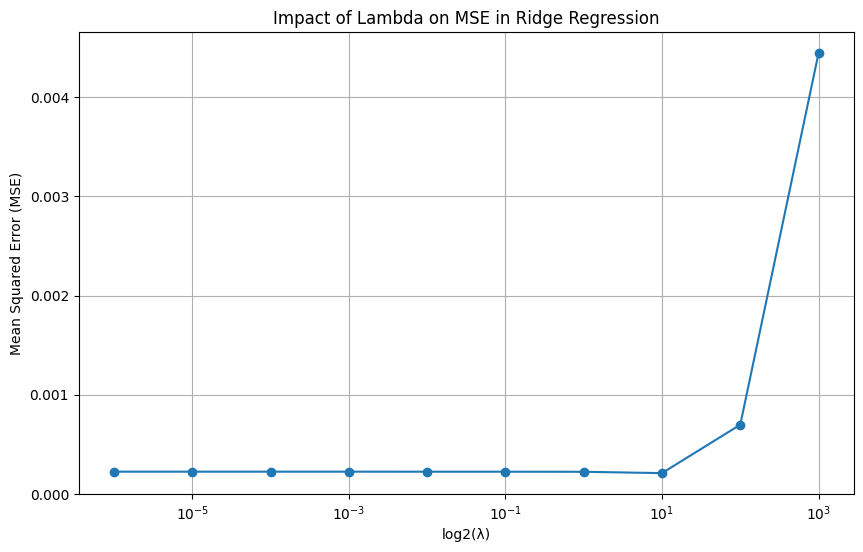

In [48]:
lambda_values_plot = [x[0] for x in lambda_errors]
rmse_values_plot = [x[1] for x in lambda_errors]

# Plotting lambda values against RMSE
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_plot, rmse_values_plot, marker='o')
plt.xscale('log')
plt.xlabel('log2(λ)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Lambda on MSE in Ridge Regression')
plt.grid(True)
plt.show()

Train the best model to the dataset

In [49]:
optimal_lambda

10

Regression model

Lambda: 1e-06, Generalization Error: 0.00022332197740157267
Lambda: 1e-05, Generalization Error: 0.00022332166633976859
Lambda: 0.0001, Generalization Error: 0.0002233185624432264
Lambda: 0.001, Generalization Error: 0.00022328818769211116
Lambda: 0.01, Generalization Error: 0.00022304364404866954
Lambda: 0.1, Generalization Error: 0.0002229893697077147
Lambda: 1, Generalization Error: 0.0002221930602974145
Lambda: 10, Generalization Error: 0.00020868407689851397
Lambda: 100, Generalization Error: 0.0006969992283983027
Lambda: 1000, Generalization Error: 0.004446509856537911
Coefficients of the selected model:
id: 1.6408533419330912e-10
diagnosis: -0.062442493203970356
radius: 0.48655349518090635
texture: 0.008141791384051824
perimeter: 0.49361573078494214
smoothness: -0.00871655681167454
compactness: -0.17236342019497272
concavity: 0.058610550650849656
concave points: 0.10515385405493358
symmetry: -0.0007384845971723791
fractal_dimension: 0.0633909317901649

Effect of individual attri

c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.92079e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


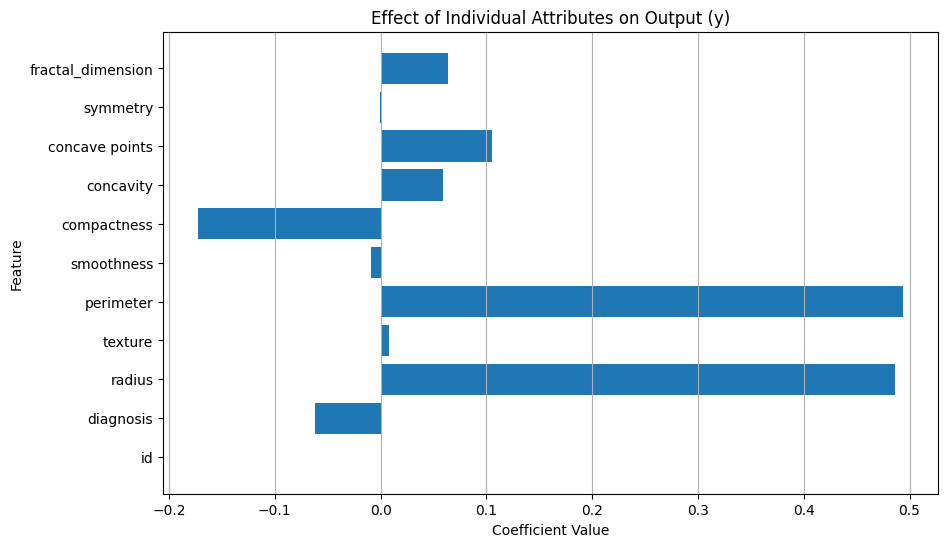

In [51]:
# Select the optimal lambda based on the minimum generalization error
optimal_lambda = min(lambda_errors, key=lambda x: x[1])[0]

# Print lambda values and corresponding generalization errors
for lmbda, error in lambda_errors:
    print(f"Lambda: {lmbda}, Generalization Error: {error}")

# Get the coefficients of the linear model with the lowest generalization error
best_model = Ridge(alpha=optimal_lambda)
best_model.fit(X, y)
coefficients = best_model.coef_

# Print the coefficients of the selected model
print("Coefficients of the selected model:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

# Analyze the effect of individual attributes on the output y
print("\nEffect of individual attributes on the output (y):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

# Evaluate whether the effect of individual attributes makes sense based on domain knowledge
# Add your analysis here based on your understanding of the problem and the dataset

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(X.columns, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Effect of Individual Attributes on Output (y)')
plt.grid(axis='x')
plt.show()


Compare three models

_____________________________________________________________________________________________________________________________________________________________

Regression Part B

In [63]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
import numpy as np

# Define the range of lambda values for regularized linear regression
lambda_values = [0.1, 1, 10, 100, 1000, 10000]

# Define the range of values for the number of hidden units (h) for ANN
hidden_units_values = [1, 2, 4, 8, 16, 32, 64, 128]

# Perform outer K1-fold cross-validation
outer_kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store model performance metrics
linear_reg_errors = []
ann_errors = []
baseline_errors = []

# Perform outer cross-validation loop
for i, (train_index, test_index) in enumerate(outer_kf.split(X)):
    X_train_outer, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_outer, y_test = y.iloc[train_index], y.iloc[test_index]

    # Baseline model: Linear regression with no features (mean of y)
    y_mean = np.mean(y_train_outer)
    y_pred_baseline = np.full_like(y_test, y_mean)
    baseline_error = np.mean((y_pred_baseline - y_test) ** 2)
    baseline_errors.append(baseline_error)

    # Perform inner K2-fold cross-validation for regularized linear regression
    inner_kf = KFold(n_splits=10, shuffle=True, random_state=42)
    lambda_errors = []
    for lmbda in lambda_values:
        ridge_model = Ridge(alpha=lmbda)
        inner_errors = []
        for inner_train_index, val_index in inner_kf.split(X_train_outer):
            X_train_inner, X_val = X_train_outer.iloc[inner_train_index], X_train_outer.iloc[val_index]
            y_train_inner, y_val = y_train_outer.iloc[inner_train_index], y_train_outer.iloc[val_index]

            ridge_model.fit(X_train_inner, y_train_inner)
            y_pred_val = ridge_model.predict(X_val)
            inner_error = np.mean((y_pred_val - y_val) ** 2)
            inner_errors.append(inner_error)
        avg_inner_error = np.mean(inner_errors)
        lambda_errors.append((lmbda, avg_inner_error))

    # Select the optimal lambda based on the minimum inner error
    optimal_lambda = min(lambda_errors, key=lambda x: x[1])[0]
    best_ridge_model = Ridge(alpha=optimal_lambda)
    best_ridge_model.fit(X_train_outer, y_train_outer)
    y_pred_ridge = best_ridge_model.predict(X_test)
    ridge_error = np.mean((y_pred_ridge - y_test) ** 2)
    linear_reg_errors.append(ridge_error)
    print(f"Iteration {i + 1}: Linear Regression MSE: {ridge_error}")

    # Perform inner K2-fold cross-validation for ANN
    ann_errors_inner = []
    for h in hidden_units_values:
        ann_model = MLPRegressor(hidden_layer_sizes=(h,), max_iter=1000, random_state=42)
        inner_errors = []
        for inner_train_index, val_index in inner_kf.split(X_train_outer):
            X_train_inner, X_val = X_train_outer.iloc[inner_train_index], X_train_outer.iloc[val_index]
            y_train_inner, y_val = y_train_outer.iloc[inner_train_index], y_train_outer.iloc[val_index]

            ann_model.fit(X_train_inner, y_train_inner)
            y_pred_val = ann_model.predict(X_val)
            inner_error = np.mean((y_pred_val - y_val) ** 2)
            inner_errors.append(inner_error)
        avg_inner_error = np.mean(inner_errors)
        ann_errors_inner.append((h, avg_inner_error))

    # Select the optimal number of hidden units based on the minimum inner error
    optimal_h = min(ann_errors_inner, key=lambda x: x[1])[0]
    best_ann_model = MLPRegressor(hidden_layer_sizes=(optimal_h,), max_iter=1000, random_state=42)
    best_ann_model.fit(X_train_outer, y_train_outer)
    y_pred_ann = best_ann_model.predict(X_test)
    ann_error = np.mean((y_pred_ann - y_test) ** 2)
    ann_errors.append(ann_error)
    print(f"Iteration {i + 1}: ANN MSE: {ann_error}")

# Compute average errors for each model
avg_linear_reg_error = np.mean(linear_reg_errors)
avg_ann_error = np.mean(ann_errors)
avg_baseline_error = np.mean(baseline_errors)

# Print the average errors
print("Average Error (Baseline):", avg_baseline_error)
print("Average Error (Ridge Regression):", avg_linear_reg_error)
print("Average Error (ANN):", avg_ann_error)

# Print errors collectively
print("Linear Regression Errors:", linear_reg_errors)
print("ANN Errors:", ann_errors)
print("Baseline Errors:", baseline_errors)


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.5863e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.61674e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.80686e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.11859e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\anto

Iteration 1: Linear Regression MSE: 0.01575824754747363


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1: ANN MSE: 0.7747526062751122
Iteration 2: Linear Regression MSE: 0.013956314415245674


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.25389e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.67708e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.44876e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.94795e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ant

Iteration 2: ANN MSE: 1.1224234420959063
Iteration 3: Linear Regression MSE: 0.015401229389951792


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.33603e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.86634e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.88838e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.89976e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ant

Iteration 3: ANN MSE: 0.9190935397939635
Iteration 4: Linear Regression MSE: 0.013177516698455962


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.71349e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.41436e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.51045e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.65712e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ant

Iteration 4: ANN MSE: 0.6223727612419453
Iteration 5: Linear Regression MSE: 0.02253997997744684


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.61997e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.04999e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.70509e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.96041e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ant

Iteration 5: ANN MSE: 0.937830735256955
Iteration 6: Linear Regression MSE: 0.02090187502932867


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.72875e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.29965e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.03899e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.91372e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ant

Iteration 6: ANN MSE: 1.715765221084528
Iteration 7: Linear Regression MSE: 0.011102195087865734


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.7941e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.3375e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.25106e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.99136e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot

Iteration 7: ANN MSE: 0.8559098978988401
Iteration 8: Linear Regression MSE: 0.01568061102620391


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.9917e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.98685e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.26992e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.77763e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\anto

Iteration 8: ANN MSE: 0.6587176708748179


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.53135e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.22105e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.86446e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.86174e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ant

Iteration 9: Linear Regression MSE: 0.062052184989580844


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9: ANN MSE: 1.6839855480010757
Iteration 10: Linear Regression MSE: 0.00928999480444387


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.6551e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.31832e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.42716e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.05063e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\anto

Iteration 10: ANN MSE: 0.9244138792479651
Average Error (Baseline): 1.0042781475410094
Average Error (Ridge Regression): 0.019986014896599694
Average Error (ANN): 1.0215265301771108
Linear Regression Errors: [0.01575824754747363, 0.013956314415245674, 0.015401229389951792, 0.013177516698455962, 0.02253997997744684, 0.02090187502932867, 0.011102195087865734, 0.01568061102620391, 0.062052184989580844, 0.00928999480444387]
ANN Errors: [0.7747526062751122, 1.1224234420959063, 0.9190935397939635, 0.6223727612419453, 0.937830735256955, 1.715765221084528, 0.8559098978988401, 0.6587176708748179, 1.6839855480010757, 0.9244138792479651]
Baseline Errors: [0.7903520869603834, 1.0821726442980384, 0.8627869707290601, 0.6470223833094803, 0.9543699508160102, 1.63983137763832, 0.8539044776784122, 0.65869044932479, 1.6429588815831664, 0.9106922530724344]


In [62]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor

# Define the range of lambda values for regularized linear regression
lambda_values = [0.1, 1, 10, 100, 1000, 10000]

# Define the range of values for the number of hidden units (h) for ANN
hidden_units_values = [1, 2, 4, 8, 16, 32, 64, 128]

# Perform outer K1-fold cross-validation
outer_kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the results
results = []

# Outer cross-validation loop
for fold, (train_index, test_index) in enumerate(outer_kf.split(X)):
    X_train_outer, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_outer, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize lists to store inner loop results
    inner_results = []
    
    # Perform inner K2-fold cross-validation for both Ridge Regression and ANN
    inner_kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for inner_train_index, val_index in inner_kf.split(X_train_outer):
        X_train_inner, X_val = X_train_outer.iloc[inner_train_index], X_train_outer.iloc[val_index]
        y_train_inner, y_val = y_train_outer.iloc[inner_train_index], y_train_outer.iloc[val_index]
        
        # Ridge Regression
        ridge_errors = []
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_train_inner, y_train_inner)
            y_pred_ridge = ridge_model.predict(X_val)
            ridge_error = np.mean((y_pred_ridge - y_val) ** 2)
            ridge_errors.append((lmbda, ridge_error))
        
        # Select the optimal lambda for Ridge Regression
        optimal_lambda_ridge, _ = min(ridge_errors, key=lambda x: x[1])
        
        # ANN
        ann_errors = []
        for h in hidden_units_values:
            ann_model = MLPRegressor(hidden_layer_sizes=(h,), max_iter=1000, random_state=42)
            ann_model.fit(X_train_inner, y_train_inner)
            y_pred_ann = ann_model.predict(X_val)
            ann_error = np.mean((y_pred_ann - y_val) ** 2)
            ann_errors.append((h, ann_error))
        
        # Select the optimal number of hidden units for ANN
        optimal_h_ann, _ = min(ann_errors, key=lambda x: x[1])
        
        # Compute generalization errors for Ridge Regression and ANN using the optimal parameters
        best_ridge_model = Ridge(alpha=optimal_lambda_ridge)
        best_ridge_model.fit(X_train_outer, y_train_outer)
        y_pred_ridge_test = best_ridge_model.predict(X_test)
        ridge_test_error = np.mean((y_pred_ridge_test - y_test) ** 2)
        
        best_ann_model = MLPRegressor(hidden_layer_sizes=(optimal_h_ann,), max_iter=1000, random_state=42)
        best_ann_model.fit(X_train_outer, y_train_outer)
        y_pred_ann_test = best_ann_model.predict(X_test)
        ann_test_error = np.mean((y_pred_ann_test - y_test) ** 2)
        
        # Baseline test error
        y_mean = np.mean(y_train_outer)
        y_pred_baseline_test = np.full_like(y_test, y_mean)
        baseline_test_error = np.mean((y_pred_baseline_test - y_test) ** 2)
        
        # Append the results for this inner fold to the inner_results list
        inner_results.append((optimal_lambda_ridge, optimal_h_ann, ridge_test_error, ann_test_error, baseline_test_error))
    
    # Compute the average results for this outer fold and append to the results list
    avg_results_outer_fold = np.mean(inner_results, axis=0)
    results.append(avg_results_outer_fold)

# Print the results in a tabular format
print("Fold\tλ* (Ridge)\th* (ANN)\tE_test_ridge\tE_test_ann\tE_test_baseline")
for fold, (opt_lambda_ridge, opt_h_ann, test_error_ridge, test_error_ann, test_error_baseline) in enumerate(results):
    print(f"{fold+1}\t{opt_lambda_ridge:.2f}\t\t{opt_h_ann}\t\t{test_error_ridge:.6f}\t{test_error_ann:.6f}\t{test_error_baseline:.6f}")


c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.5863e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.27271e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.84171e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\antot\miniconda3\envs\exercises\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.42424e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\anto

Fold	λ* (Ridge)	h* (ANN)	E_test_ridge	E_test_ann	E_test_baseline
1	5.05		1.0		0.015567	0.774753	0.790352
2	2.26		1.0		0.014277	1.122423	1.082173
3	4.15		1.0		0.014678	0.919094	0.862787
4	4.24		1.0		0.013012	0.622373	0.647022
5	6.22		1.0		0.021978	0.937831	0.954370
6	4.33		1.0		0.022560	1.715765	1.639831
7	2.17		7.3		0.011371	34046036.751270	0.853904
8	3.25		1.0		0.015212	0.658718	0.658690
9	4.33		1.0		0.069833	1.683986	1.642959
10	3.25		1.0		0.009817	0.924414	0.910692


In [70]:
from scipy import stats
import numpy as np

# Function to calculate confidence interval
def calculate_confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    t_value = stats.t.ppf(1 - 0.05 / 2, n - 1)  # 95% confidence interval
    margin_of_error = t_value * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Confidence intervals
ci_baseline = calculate_confidence_interval(baseline_errors)
ci_ann = calculate_confidence_interval(ann_errors)
ci_linear_reg = calculate_confidence_interval(linear_reg_errors)

# Perform paired t-tests
t_stat_ann_lr, p_value_ann_lr = stats.ttest_rel(ann_errors, linear_reg_errors)
t_stat_ann_baseline, p_value_ann_baseline = stats.ttest_rel(ann_errors, baseline_errors)
t_stat_lr_baseline, p_value_lr_baseline = stats.ttest_rel(linear_reg_errors, baseline_errors)

# Print confidence intervals
print("Confidence Intervals:")
print("Baseline:", ci_baseline)
print("ANN:", ci_ann)
print("Linear Regression:", ci_linear_reg)

# Print results of t-tests
print("\nPaired t-test: ANN vs. Linear Regression")
print("t-statistic:", t_stat_ann_lr)
print("p-value:", p_value_ann_lr)

print("\nPaired t-test: ANN vs. Baseline")
print("t-statistic:", t_stat_ann_baseline)
print("p-value:", p_value_ann_baseline)

print("\nPaired t-test: Linear Regression vs. Baseline")
print("t-statistic:", t_stat_lr_baseline)
print("p-value:", p_value_lr_baseline)


Confidence Intervals:
Baseline: (0.7601520220937865, 1.2484042729882323)
ANN: (0.7599358456241203, 1.2831172147301013)
Linear Regression: (0.00959388299172109, 0.030378146801478295)

Paired t-test: ANN vs. Linear Regression
t-statistic: 8.43997609376791
p-value: 1.439584936810123e-05

Paired t-test: ANN vs. Baseline
t-statistic: 1.5907340279513134
p-value: 0.14613294022266424

Paired t-test: Linear Regression vs. Baseline
t-statistic: -8.913786630032039
p-value: 9.23689470538388e-06


C:\Users\antot\AppData\Local\Temp\ipykernel_24780\2395321745.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ci, label=label, shade=True)
C:\Users\antot\AppData\Local\Temp\ipykernel_24780\2395321745.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ci, label=label, shade=True)
C:\Users\antot\AppData\Local\Temp\ipykernel_24780\2395321745.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ci, label=label, shade=True)


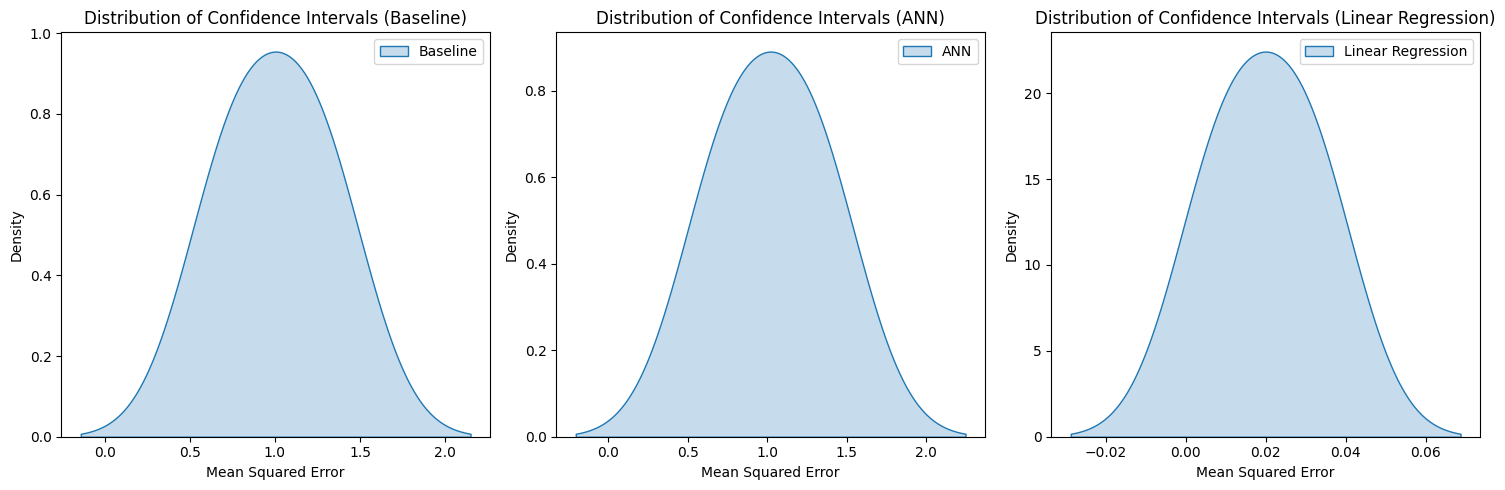

In [71]:
# Define the confidence intervals and labels
cis = [ci_baseline, ci_ann, ci_linear_reg]
labels = ['Baseline', 'ANN', 'Linear Regression']

# Plotting the distribution of confidence intervals
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, (ci, label) in enumerate(zip(cis, labels), start=1):
    plt.subplot(1, 3, i)
    sns.kdeplot(ci, label=label, shade=True)
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Density')
    plt.title(f'Distribution of Confidence Intervals ({label})')
    plt.legend()
plt.tight_layout()
plt.show()
